![](http://www.forkscorksandkegs.com/wp-content/uploads/2012/06/Banner-Vineyard-927x282.png)
# Final Project (Wine Quality Predictor)

## 1. Introduction

**1.1) Problem Statement**

Predict the quality of wine based on chemical properties.

**1.2) Use Cases**

The machine learn algorithm can help wineries during the maturity process of the wine to balance certain chemicals in order to improve the wine quality. 

**1.3) Exclusions** 

There are other features important to consider when producing wine that are not contemplated on this study such season weather, soil conditions, harvest date, aging, grape type, etc. 

**1.4) Original Idea**

The original idea for this project came from the [Analytics Vidhya blog](https://www.analyticsvidhya.com/blog/2018/05/24-ultimate-data-science-projects-to-boost-your-knowledge-and-skills/) post containing ideas for Machine Learning Projects.

## 2. The Dataset

I have two data sets (Red/White) containing the chemical properties (by lab) and the respective overall quality (assessed by wine experts) for respectively 1599 Red and 4898 White wines.

The data sets contain the following information:

|Property|Description|
|--:|:--|
|Fixed Acidity |Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).|
|Volatile Acidity|The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
|Citric Acidity|The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
|Residual Sugar|The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
|Chlorides|The Amount of salt in the wine.
|Free Sulfur Dioxide|The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
|Total Sulfur Dioxide|Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
|Density|The density of water is close to that of water depending on the percent alcohol and sugar content.
|pH|How acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
|Sulphates|A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.
|Alcohol|The percent alcohol content of the wine.
|Quality|The overall quality of the wine classified by a wine expert.

Data set link: [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)


## 3. Exploratory Data Analysis (EDA)

### 3.1 Introduction

Since both red and white wines can potentially have different properties, we'll be splitting the analysis into two dinstinct datasets. At the end, we'll be drawing conclusions on how we approach the Red/White wines quality analysis distinctively.

In [142]:
# import necessary libs for EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### 3.2 Red Wine

In [155]:
# Load dataset
red = pd.read_csv('./datasets/winequality-red.csv')

In [144]:
# With info() we'll quickly check a summary of:
# 1. Data volume (number rows)
# 2. The data types (check if there's any need of data type conversion)
# 3. The atributes or columns in the data frame
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [156]:
# Check for duplicates - On this case it seems to be duplicates (trimmed below) but these are different Wines
# with exact same attributes.
red[red.duplicated(keep=False)].head(6)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
27,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5


In [157]:
# We will drop the "duplicates" because for our study it's not relevant to have multiple samples of wines
# with the exactly same attributes.
red = red.drop_duplicates(subset=None, keep="first", inplace=False)

In [158]:
# Check new record size
red.shape

(1359, 12)

In [160]:
# Summary of the attributes to get an idea how the attributes value ranges and averages
red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Observation**

An important observation are the quality attributes. The wines rate from 0-10, which zero is the worst and 10 the best.

* Highest: 8 
* Mean: 5.63
* Lowest: 3

I have defined the following qualitiative rating scale:


|Rating |Description     |
|------:|:---------------|
|1      | Demolish       |
|2      | Horrible       |
|3      | Terrible       |
|4      | Bad            |
|5      | OK             |
|6      | Good           |
|7      | Very Good      |
|8      | Great          |
|9      | Excellent      |
|10     | Perfect        |

This being said, since the **average red wine quality is 5.63** we can say the great majority of the samples the wine is "Good".

In [161]:
# Let's check if there's any null value - None on this case
red.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

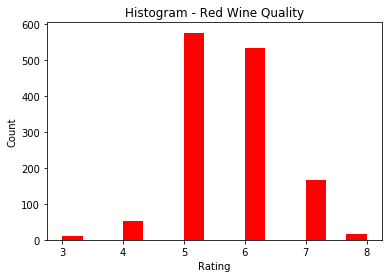

In [162]:
# Visualize the quality of the Red Wines in the dataset
num_bins = 15
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram - Red Wine Quality')
plt.hist(red['quality'], bins=num_bins, facecolor='red')
plt.show()

In [163]:
# Count per Rate (table view)
red.groupby(['quality'])['quality'].count()

quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: quality, dtype: int64

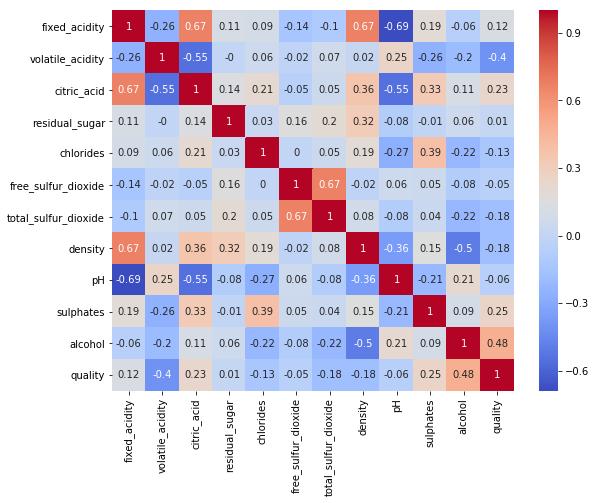

In [164]:
# Next, we'll produce a correlation heatmap. We expect to observe which red wine features
# are strongly correlated with the Quality.
plt.subplots(figsize=(9,7))
sns.heatmap(data=red.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":10})
plt.show()

### Observations

We can observe that strongest feature correlations with the "Quality" are:

1. Alcohol (+0.48)
2. Volatile Acidity (-0.40)
3. Sulphates (+0.25)
4. Citric Acid (+0.23)
5. Total Sulfur Dioxide (-0.18)

Other features such as "Free Sulfur Dioxide" and "Residual Sugars" have nearly zero correlation.

It's also observable than the "acidity" features are strongly correlated with the "pH" - which by knowing elementary chemistry makes all the sense. However this is not our focus.

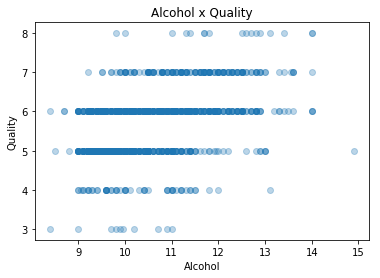

In [176]:
# visualising the relationship between the Alcohol level and Quality
plt.title("Alcohol x Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.scatter(red['alcohol'], red['quality'], alpha=0.3)
plt.show()

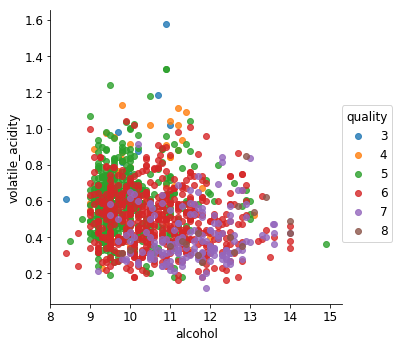

In [190]:
# Visualising the two featurs with strongest correlation with quality
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12
sns.lmplot(x="alcohol", y="volatile_acidity", data=red, hue="quality", fit_reg=False, legend=True)
plt.show()

### 3.3 White Wines

In [30]:
# Load dataset 
white = pd.read_csv('./datasets/winequality-white.csv')

In [31]:
# With info() we'll quickly check a summary of:
# 1. Data volume (number rows)
# 2. The data types (check if there's any need of data type conversion)
# 3. The atributes or columns in the data frame
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [165]:
# Check for duplicates - On this case it seems to be duplicates (trimmed below) but these are different Wines
# with exact same attributes.
white[white.duplicated(keep=False)].head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [168]:
# We will drop the "duplicates" because for our study it's not relevant to have multiple samples of wines
# with the exactly same attributes.
white = white.drop_duplicates(subset=None, keep="first", inplace=False)

In [169]:
# Check new size
white.shape

(3961, 12)

In [170]:
# Summary of the attributes to get an idea how the attributes value ranges and averages
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Observation**

This being said, since the **average white wine quality is 5.85** we can say the great majority of the samples the wine is "Good".

In [171]:
# Let's check if there's any null value - None on this case
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

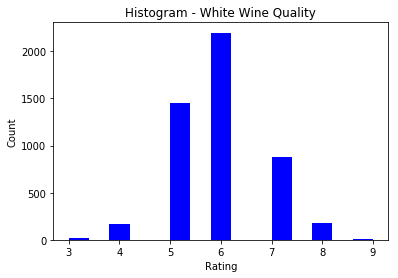

In [42]:
# Visualize the quality of the White Wines in the dataset
num_bins = 15
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram - White Wine Quality')
plt.hist(white['quality'], bins=num_bins, facecolor='blue')
plt.show()

In [52]:
# Count per Rate (table view)
white.groupby(['quality'])['quality'].count()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

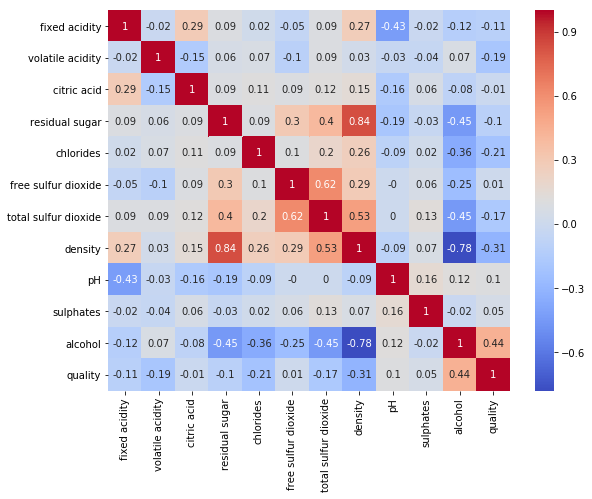

In [45]:
# Next, we'll produce a correlation heatmap. We expect to observe which white wine features
# are strongly correlated with the Quality.
plt.subplots(figsize=(9,7))
sns.heatmap(data=white.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":10})
plt.show()

### Observations

We can observe that strongest feature correlations with the "Quality" are:

1. Alcohol (+0.44)
2. Density (-0.31)
3. Chloride (-0.21)
4. Volatile Acidity (-0.19)
5. Total Sulfur Dioxide (-0.17)


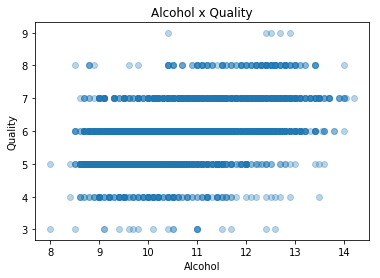

In [175]:
# visualising the relationship between the Alcohol level and Quality
plt.title("Alcohol x Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.scatter(white['alcohol'], white['quality'], alpha=0.3)
plt.show()

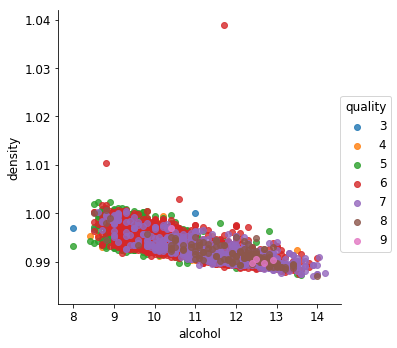

In [189]:
# Visualising the two featurs with strongest correlation with quality
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12
sns.lmplot(x="alcohol", y="density", data=white, hue="quality", fit_reg=False, legend=True)
plt.show()

### 3.4 Conclusions

As I believe it could happen, the top 5 features that strongly correlate with quality **are not the same** between red and white wines. 

Therefore it is important for this study that we split both wine types with different approaches - That can eventually be similar but not the same.

On possible **shortcoming** is that in both datasets lack samples of extremely low/high rating such as (1,2) and (9,10) therefore our model might not be accurately predict these quality ranges as we have no means to validate its accuracy since there are no samples with these ratings in the dataset. It is expected that as more data gets into to the data, the accuracy model improves by learning from new additions.